1. tsv파일 로드 
2. order_id 컬럼은 숫자의 의미를 가지지 않기 때문에 문자형 데이터를 변환
3. 가장 많이 주문한 item_name과 그 수량을 출력
4. item당 주문 총량 구하고 바형 그래프 출력
5. item_price 컬럼은 $금액 -> 금액 변경을 하면서 float의 형태로 변환
6. 주문당 평균 계산 금액 출력
7. 각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력
8. "Chicken Bowl"을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량 출력

In [1]:
import pandas as pd

In [2]:
## tsv 파일 로드 
chipo = pd.read_csv("../csv/num_1/chipotle.tsv", sep="\t")
chipo.head(1)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39


In [3]:
chipo_copy = chipo

In [5]:
## order_id 컬럼은 숫자의 의미가 없기 때문에 문자열로 데이터형 변환
## astype() 함수를 이용하여 데이터의 형태를 변환
chipo_copy["order_id"] = chipo_copy["order_id"].astype(str)

In [11]:
## 가장 많이 주문한 item_name과 그 수량을 출력
## 그룹화 -> sum() -> quantity -> sort_values 내림차순 정렬
## top10을 출력하려면? 

chipo_copy.groupby("item_name").sum()["quantity"].sort_values(ascending=False).head(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [ ]:
## 주문 횟수가 가장 많은 메뉴는???
chipo_copy["item_name"].value_counts()

In [ ]:
chipo_copy.groupby("item_name").count().sort_values("order_id", ascending=False)

In [16]:
## 주문 총량 시각화 
import matplotlib.pyplot as plt

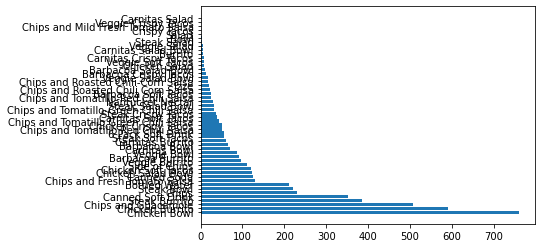

In [18]:
## 주문총량 바형 그래프로 출력

## 그룹화한 데이터프레임을 변수에 저장
group_data = chipo_copy.groupby("item_name").sum()["quantity"].sort_values(ascending=False)

## x축과 y축의 값을 어떠한 값을 넣어야 할지 지정
x = group_data.index
y = group_data.values

## 시각화 바형 그래프 출력
plt.barh(x, y)
plt.show()


In [28]:
## item_price 컬럼의 데이터에서 $를 삭제하고 데이터의 형태를 float 변경

## $를 삭제
# 일반적인 replace() 함수를 이용하여 삭제
# chipo_copy["item_price"].str.replace("$", "")
# apply()와 replace() 를 이용한 삭제
# def change(x):      # x는 매개변수
#     result = x.replace("$", "")     # result는 지역변수
#     return result

# chipo_copy["item_price"].apply(change)
# apply() , lambda(), replace() 를 이용한 삭제
# chipo_copy["item_price"].apply(lambda x : x.replace("$", ""))
# strip()을 이용하여 $를 삭제
chipo_copy["item_price"] = chipo_copy["item_price"].str.lstrip("$").astype("float")
  

In [30]:
## 주문당 평균 금액 

## order_id를 기준으로 그룹화 --> sum()['item_price']
chipo_copy.groupby('order_id').sum()['item_price'].mean()
## item_price 평균

18.811428571428568

In [35]:
## 각 아이템당 가격을 출력

## item_name를 기준으로 그룹화 합계
group_data_2 = chipo_copy.groupby("item_name").sum()

In [38]:
## item_price / quantity
item_data = group_data_2['item_price'] / group_data_2['quantity']

In [43]:
## 가장 비싼 메뉴와 가장 싼 메뉴?

## 가장 비싼 메뉴 ? 
item_data.sort_values(ascending=False).head(1)

## 가장 싼 메뉴 ? 
item_data.sort_values().head(1)
item_data.sort_values(ascending=False).tail(1)

item_name
Canned Soda    1.09
dtype: float64

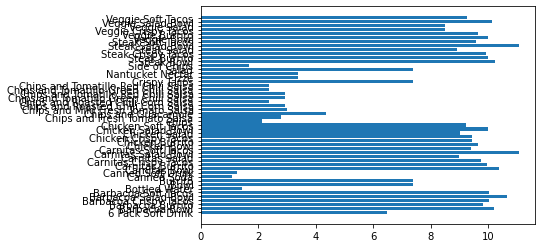

In [44]:
## 아이템당 가격분포 그래프 바형 그래프 출력

x = item_data.index
y = item_data

plt.barh(x, y)
plt.show()

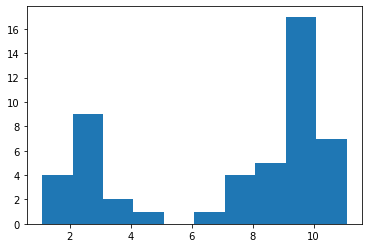

In [47]:
## 히스토그램 출력
plt.hist(y)
plt.show()

In [52]:
## chicken bowl 2개 이상 주문한 고객들이 주문한 chicken bowl 총 주문 수량

## chicken bowl 2개 이상 주문한 내역 출력
chipo_copy.loc[(chipo_copy["item_name"] == 'Chicken Bowl') & 
                (chipo_copy["quantity"] >= 2)].sum()["quantity"]

68